In [88]:
import h5py as h

In [29]:
ds = h.File('catalog.h5')
print(ds)

<HDF5 file "catalog.h5" (mode r)>


In [30]:
ds.keys()

<KeysViewHDF5 ['Halo00000000', 'Halo00000001', 'Halo00000002', 'Halo00000003', 'Halo00000004', 'Halo00000005', 'Halo00000006', 'Halo00000007', 'Halo00000008', 'Halo00000009', 'Halo00000010', 'Halo00000011', 'Halo00000012', 'Halo00000013', 'Halo00000014', 'Halo00000015', 'Halo00000016', 'Halo00000017', 'Halo00000018', 'Halo00000019', 'Halo00000020', 'Halo00000021', 'Halo00000022', 'Halo00000023', 'Halo00000024', 'Halo00000025', 'Halo00000026', 'Halo00000027', 'Halo00000028', 'Halo00000029', 'Halo00000030', 'Halo00000031', 'Halo00000032', 'Halo00000033', 'Halo00000034', 'Halo00000035', 'Halo00000036', 'Halo00000037', 'Halo00000038', 'Halo00000039', 'Halo00000040', 'Halo00000041', 'Halo00000042', 'Halo00000043', 'Halo00000044', 'Halo00000045', 'Halo00000046', 'Halo00000047', 'Halo00000048', 'Halo00000049', 'Halo00000050', 'Halo00000051', 'Halo00000052', 'Halo00000053', 'Halo00000054', 'Halo00000055', 'Halo00000056', 'Halo00000057', 'Halo00000058', 'Halo00000059', 'Halo00000060', 'Halo0000

In [31]:
for key in ds.keys():
    print(ds[key].keys())
    break

<KeysViewHDF5 ['M_HI', 'M_HII', 'Mstar', 'Mstar_pop2', 'Mstar_pop2_young', 'Mstar_pop3', 'Nesc', 'Ntot', 'NumberOfPop2Stars', 'NumberOfPop3Stars', 'SFR', 'center', 'fesc', 'fgas', 'fstar', 'mass', 'redshift', 'rvir']>


In [32]:
# append to hdf5 file
import yt

In [33]:
half_rad = []
for halo in ds.keys():
    center = list(ds[halo]['SFR'])

In [34]:
center

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.510385777184007e-05,
 5.036834833717145e-05,
 0.001991233705686818,
 0.004023154669108055,
 0.005117357639142305,
 0.0058649787944295905,
 0.006344632829132147,
 0.001784146027742063,
 0.0008458373783667337,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
all_groups = {}
fescs = []
groups = []
fgases = []
masses = []
SFRs = [] 
Mstars = []
redshifts = []
for halo in ds.keys(): # loops through halos
    fesc_list = list(ds[halo]['fesc'])
    fgas_list = list(ds[halo]['fgas'])
    mass_list = list(ds[halo]['mass'])
    SFR_list = list(ds[halo]['SFR'])
    Mstar_list = list(ds[halo]['Mstar'])
    redshift_list = list(ds[halo]['redshift'])    
    for index, fesc in enumerate(fesc_list):# loops thru timestep
        if fesc <= 0.01:
            group = 0
        elif 0.01 < fesc <= 0.10:
            group = 1
        elif 0.10 < fesc <= 0.25:
            group = 2
        else:
            group = 3
        # used enumerate to find index and only use "good" values
        if fesc >= 1e-5:
            fescs.append(fesc)
            groups.append(group)
            fgases.append(ds[halo]['fgas'][index])
            masses.append(ds[halo]['mass'][index])
            SFRs.append(ds[halo]['SFR'][index])
            Mstars.append(ds[halo]['Mstar'][index])
            redshifts.append(ds[halo]['redshift'][index])
    all_groups[halo] = groups

# Sanity check: All parameter arrays should be same size
print(len(fescs), len(fgases), len(masses), len(SFRs), len(Mstars), len(redshifts)) # length is 3122 for all

# Sanity check 2: Length of all_groups should be same as number of halos
print(len(ds.keys()) == len(all_groups)) # length is 296




3122 3122 3122 3122 3122 3122
True


In [37]:
# np.min(SFRs[SFRs != 0])
minsfr = 100
for each in SFRs:
    if each < minsfr and each != 0.:
        minsfr = each
print(each)

0.001784146027742063


In [38]:
masses

[3380224926.992715,
 3299024674.3191757,
 3215556588.5356255,
 3073838923.8206606,
 2913785711.4873447,
 2570655484.3533587,
 2505834729.167289,
 2179203186.494319,
 2211860439.447175,
 2065288017.7761762,
 1919810286.4714735,
 1926627326.835315,
 1865044999.2645564,
 1783539688.5521364,
 1735776109.215406,
 1637180689.951307,
 1544123131.7256577,
 1509318050.1285434,
 1459479703.8098915,
 1248771742.1926913,
 1355361377.037151,
 1283150317.9564598,
 1181455323.4343517,
 1073240290.0893987,
 976530180.0497017,
 913880651.8249165,
 870989705.1505412,
 844812887.7485251,
 824996976.5826399,
 803019299.6994716,
 777856081.5802172,
 750390965.2046118,
 726505066.4823706,
 694341775.3481793,
 652087701.6425964,
 601432744.4017963,
 520968863.5503441,
 503570456.4282901,
 466475690.4399628,
 446138054.0223443,
 418339093.33234394,
 391071675.34323955,
 342665675.71371824,
 325958161.47398007,
 314420966.1949795,
 290128810.875418,
 266585862.57688087,
 244384647.05748343,
 223666328.5336163,

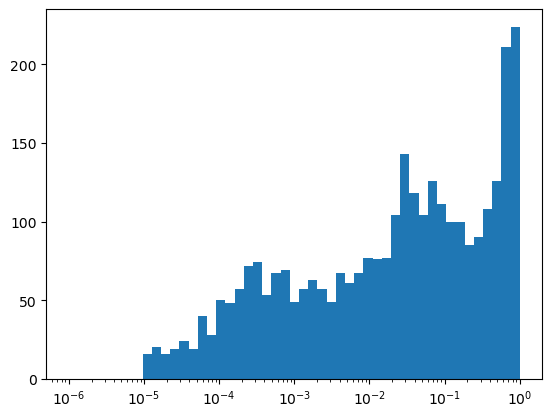

In [39]:
plt.hist(fescs, bins = np.logspace(-6, 0))
plt.xscale('log')

## Architecture

In [40]:
import torch 
import torch.nn as nn
import numpy as np
import sys, os, time
import optuna # Optimizer

In [41]:
# 1 hidden layer code

# inp ---------> size of input data
# h1 ----------> size of first hidden layer
# out ---------> size of output data
# dr ----------> dropout rate
class model_1hl(nn.Module):
    
    def __init__(self, inp, h1, out, dr):
        super(model_1hl, self).__init__()

        self.fc1 = nn.Linear(inp, h1) # lin trans
        self.fc2 = nn.Linear(h1,  out)
        
        self.dropout   = nn.Dropout(p=dr) #normalizes by zeroing at random
        self.ReLU      = nn.ReLU() # RELU(x) = max(0,x)
        self.LeakyReLU = nn.LeakyReLU(0.2) # LeakyReLU = max(0,x) + neg_slope * min(0,x)
        
        # initialize the weights of the different layers
        for m in self.modules(): 
            if isinstance(m, nn.BatchNorm3d) or isinstance(m, nn.BatchNorm1d): # if module is Batch normalization: y = gamma*(x -  E(x))/sqrt(Var(x) + eps) + b
                nn.init.constant_(m.weight, 1) 
                nn.init.constant_(m.bias, 1)
            elif isinstance(m, nn.Conv3d) or isinstance(m, nn.ConvTranspose2d) or isinstance(m, nn.Linear):
                 '''if module is 3D Convolution: over an input signal composed of several input planes. or ConvTranspose2d Applies a 3D transposed convolution operator over an input image composed of several input planes. The transposed convolution operator multiplies each input value element-wise by a learnable kernel, and sums over the outputs from all input feature planes. Or Lin Trans'''
                 nn.init.kaiming_normal_(m.weight) # normalization that makes extremely deep models (>30 layers) to converge
       
    # forward pass
    def forward(self, x):
        out = self.dropout(self.LeakyReLU(self.fc1(x))) # Apply leakyRELU on input and dropout normalize
        out = self.fc2(out) 
        # out = nn.Softmax(out)
        return out


In [42]:
# N hidden layer code, similar structure to above but generalized
def dynamic_model2(input_size, output_size, n_layers, hidden, dr):

    # define the tuple containing the different layers
    layers = []

    # get the hidden layers
    in_features = input_size
    for i in range(n_layers):
        out_features = hidden[i]
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU(0.2))
        layers.append(nn.Dropout(dr[i]))
        in_features = out_features

    # get the last layer
    layers.append(nn.Linear(out_features, output_size))

    # return the model
    return nn.Sequential(*layers)

#model = dynamic_model2(numFeatures, outSize, numHL, [h1, h2], [dr1, dr1])

## Data

In [43]:
from random import shuffle
import torch 
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import numpy as np
import sys, os, time, h5py
from pathlib import Path

In [44]:
def normalize_data(data, labels):
    ######################
    # normalize input
    ## the id's correspond to the id's of the feature array you made using vstack in read_data()
    data[:,0]  = (data[:,0] - np.mean(data[:,0]))/np.std(data[:,0]) # Z Scores
    data[:,1]  = (data[:,1] - np.mean(data[:,1]))/np.std(data[:,1])
    data[:,2]  = (data[:,2] - np.mean(data[:,2]))/np.std(data[:,2])
    data[:,3]  = (data[:,3] - np.mean(data[:,3]))/np.std(data[:,3])
    data[:,4]  = (data[:,4] - np.mean(data[:,4]))/np.std(data[:,4])

    ######################
    # normalize labels
    print ("labels", labels)

    # # array = np.log10(labels) # Since labels are large log them
    # print("labels array", array)
    # labels = array
    
    return data, labels

In [45]:
# read data and get training, validation or testing sets
# fin ---------> file with the data
# seed --------> random seed used to split among different datasets
# mode --------> 'train', 'valid', 'test' or 'all'
# normalize ---> whether to normalize the data or not
def read_data(fin, seed, mode, normalize): #fin for h5
    File = 'catalog.h5'
    f     = h5py.File(fin, 'r')
    masses = []
    fgases = []
    SFRs = []
    Mstars = []
    redshifts = []
    fescs = []
    groups = []
    for halo in f.keys():
        fesc_list = list(f[halo]['fesc']) 
        for index, fesc in enumerate(fesc_list):
            if fesc <= 0.01:
                group = 0
            elif 0.01 < fesc <= 0.10:
                group = 1
            elif 0.10 < fesc <= 0.25:
                group = 2
            else:
                group = 3
                
            if fesc >= 1e-5:
                masses.append(f[halo]['mass'][index])
                fgases.append(f[halo]['fgas'][index])
                SFRs.append(f[halo]['SFR'][index])
                Mstars.append(f[halo]['Mstar'][index])
                redshifts.append(f[halo]['redshift'][index])
                fescs.append(fesc)
                groups.append(group)  
    # min_SFR = np.min(SFRs[SFRs != 0])
    minsfr = 100
    for each in SFRs:
        if each < minsfr and each != 0.:
            minsfr = each
    new_SFRs = []
    for SFR in SFRs:
        if SFR == 0.0:
            new_SFRs.append(minsfr*0.9)
        else:
            new_SFRs.append(SFR)        
    # normalize data - EDIT
    ## anything not on order 10^0 - 10^1 should be logged
    masses = np.log10(masses)
    SFRs = np.log10(new_SFRs)
    Mstars = np.log10(Mstars)
    fgases = np.log10(fgases)
    
    # get data, labels and number of elements
    data = np.vstack([SFRs, Mstars, masses, redshifts, fgases]).T # THESE ARE YOUR CHOSEN INPUT VARIABLES
    
    labels = np.array(groups, dtype = 'int')
    print("labels.shape", labels.shape)
    # labels = fluxes.reshape((fluxes.shape[0], fluxSize))
    elements = data.shape[0]
    
    # normalize data
    if normalize:  data, labels = normalize_data(data, labels)

    # get the size and offset depending on the type of dataset
    if   mode=='train':   size, offset = int(elements*0.70), int(elements*0.00)
    elif mode=='valid':   size, offset = int(elements*0.15), int(elements*0.70)
    elif mode=='test':    size, offset = int(elements*0.15), int(elements*0.85)
    elif mode=='all':     size, offset = int(elements*1.00), int(elements*0.00)
    else:                 raise Exception('Wrong name!')

    # randomly shuffle the cubes. Instead of 0 1 2 3...999 have a 
    # random permutation. E.g. 5 9 0 29...342
    np.random.seed(seed)
    indexes = np.arange(elements) 
    np.random.shuffle(indexes)
    indexes = indexes[offset:offset+size] #select indexes of mode

    return data[indexes], labels[indexes]



In [46]:
class make_dataset():

    def __init__(self, mode, seed, fin):

        # get data
        inp, out = read_data(fin, seed, mode, normalize=True)

        # get the corresponding bottlenecks and parameters
        self.size   = inp.shape[0]
        self.input  = torch.tensor(inp, dtype=torch.float32)
        self.output = torch.tensor(out, dtype= torch.long)
        
        print ("size of input and output", np.shape(self.input), np.shape(self.output))
        
    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.input[idx], self.output[idx]

In [47]:
def create_dataset(mode, seed, fin, batch_size, shuffle):
    data_set = make_dataset(mode, seed, fin)
    dataset_loader = DataLoader(dataset=data_set, batch_size=batch_size, shuffle=shuffle)
    return dataset_loader

## Main

In [92]:
fin = 'catalog.h5'
dataname = 'Normal'      # Nickname for data
seed = 20                # remember this to reproduce split
numFeatures = 5         # number of input properties
outSize = 4          # size of wavelength array
featurelist = 'SFRs, Mstars, masses, redshifts, fgases'

numHL = 4           # number of hidden layers
# h1 = 954                # nodes in first hidden layer
h1_1 = 326            # nodes in second hidden layer
h2_1 = 203
h3_1 = 460
h4_1 = 337
dr1_1 = 0.6140597590944773
dr2_1 = 0.28132639142015986
dr3_1 = 0.25855030410354674
dr4_1 = 0.24732580986058228
lr_1 = 0.0033140422147764532
wd_1 = 0.0020272408464552176

In [93]:
numHL = 4           # number of hidden layers
# h1 = 954                # nodes in first hidden layer
h1_2 = 319            # nodes in second hidden layer
h2_2 = 309
h3_2 = 487
h4_2 = 245
dr1_2 = 0.48326007288595463
dr2_2 = 0.22691770014786583
dr3_2 = 0.4133618765743943
dr4_2 = 0.20222387654738752
lr_2 = 0.0024461318194048767
wd_2 = 0.00038150231346785777

Trial 38 finished with value: 0.8062396895172249 and parameters: {'n_layers': 4, 'n_units_l0': 319, 'dropout_l0': 0.48326007288595463, 'n_units_l1': 309, 'dropout_l1': 0.22691770014786583, 'n_units_l2': 487, 'dropout_l2': 0.4133618765743943, 'n_units_l3': 245, 'dropout_l3': 0.20222387654738752, 'lr': 0.0024461318194048767, 'wd': 0.00038150231346785777}. Best is trial 38 with value: 0.8062396895172249.

In [94]:
numHL = 4           # number of hidden layers
# h1 = 954                # nodes in first hidden layer
h1_3 = 360            # nodes in second hidden layer
h2_3 = 318
h3_3 = 186
h4_3 = 230
dr1_3 = 0.5991490308822351
dr2_3 = 0.6557328854093288
dr3_3 = 0.2229397980059654
dr4_3 = 0.37167582651003706
lr_3 = 0.0005674724247255081
wd_3 = 4.344007387477737e-05

Trial 19 finished with value: 0.810626839980101 and parameters: {'n_layers': 4, 'n_units_l0': 360, 'dropout_l0': 0.5991490308822351, 'n_units_l1': 318, 'dropout_l1': 0.6557328854093288, 'n_units_l2': 186, 'dropout_l2': 0.2229397980059654, 'n_units_l3': 230, 'dropout_l3': 0.37167582651003706, 'lr': 0.0005674724247255081, 'wd': 4.344007387477737e-05}. Best is trial 19 with value: 0.810626839980101.

In [107]:
h1_non = 150
h2_non = 150
numHL_non = 2
# # # dr1 = 0.20103              # dropout rate for layer 1
dr1_non = 0.35
# # # training parameters
batch_size = 256  
# # # lr         = 1.404e-3     (learning rate)
lr_non = 0.01
epochs     = 1000
# # # wd         = 1.195e-6
wd_non = 0

Trial 49 finished with value: 0.7992990006748427 and parameters: {'n_layers': 4, 'n_units_l0': 326, 'dropout_l0': 0.6140597590944773, 'n_units_l1': 203, 'dropout_l1': 0.28132639142015986, 'n_units_l2': 460, 'dropout_l2': 0.25855030410354674, 'n_units_l3': 337, 'dropout_l3': 0.24732580986058228, 'lr': 0.0033140422147764532, 'wd': 0.0020272408464552176}. Best is trial 49 with value: 0.7992990006748427.

In [108]:
# name of output files


name   = "Normal_dynamicmodel2"
device = torch.device('cpu')
# define loss function
criterion = nn.CrossEntropyLoss()  # MSE or Cross Entropy

# get train, validation, and test sets
print('preparing dataset...')
train_loader = create_dataset('train', seed, fin, batch_size, True)
valid_loader = create_dataset('valid', seed, fin, batch_size, False)
test_loader  = create_dataset('test',  seed, fin, batch_size, False)



preparing dataset...
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


In [ ]:
np.array(masses).shape

In [109]:
# define architecture
# model = architecture.model_1hl(numFeatures, h1, fluxSize, dr1) # change function according to number of hidden layers
model = dynamic_model2(numFeatures, outSize, numHL, [h1_1, h2_1, h3_1, h4_1], [dr1_1, dr2_1, dr3_1, dr4_1])
#model_non = dynamic_model2(numFeatures, outSize, numHL_non, [h1_non, h2_non], [dr1_non, dr1_non])

In [110]:
fout   = 'test_optuna1_256.txt'
fmodel = 'test_optuna1_256.pt'
#casts parameters/buffers to specified gpu
model.to(device=device)
#get num elements in each network parameters and sum them
network_total_params = sum(p.numel() for p in model.parameters())
print('total number of parameters in the model = %d'%network_total_params)

# define optimizer and scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=lr_1, betas=(0.5, 0.999), 
                             weight_decay=wd_1)	


# load best-model, if it exists
'''
if os.path.exists(fmodel):  
    print('Loading model...')
    model.load_state_dict(torch.load(fmodel))
# get validation loss
print('Computing initial validation loss')
model.eval()
min_valid_loss, points = 0.0, 0
for x, y in valid_loader:
    with torch.no_grad():
        x    = x.to(device=device)
        y    = y.to(device=device)
        y_NN = model(x)
        min_valid_loss += (criterion(y_NN, y).item())*x.shape[0]
        points += x.shape[0]
min_valid_loss /= points
print('Initial valid loss = %.3e'%min_valid_loss)
'''
# see if results for this model are available (if you're continuing training on a model)
'''
if os.path.exists(fout):  
    dumb = np.loadtxt(fout, skiprows = 11, unpack=False)
    if dumb.size == 0:
        offset = 0
    else: offset = int(dumb[:,0][-1]+1)
else:   offset = 0
'''

# do a loop over all epochs
start = time.time()
min_valid_loss = 1000
for epoch in range(epochs):
    # do training
    train_loss, points = 0.0, 0
    model.train()
    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)
        y_NN = model(x)
        #y = nn.Softmax(y)
        #y_NN = nn.Softmax(y_NN)
        loss = criterion(y_NN, y)
        train_loss += (loss.item())*x.shape[0]
        points     += x.shape[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= points

    # do testing
    test_loss, points = 0.0, 0
    model.eval()
    for x, y in test_loader:
        with torch.no_grad():
            x    = x.to(device)
            y    = y.to(device)
            #y = nn.Softmax(y)
            y_NN = model(x)
            #y_NN = nn.Softmax(y_NN)
            test_loss += (criterion(y_NN, y).item())*x.shape[0]
            points    += x.shape[0]
    test_loss /= points
    
    # save model if it is better
    if test_loss<min_valid_loss:
        torch.save(model.state_dict(), fmodel)
        min_valid_loss = test_loss
        print('%03d %.3e %.3e (saving)'%(epoch, train_loss, test_loss))
    else:
        print('%03d %.3e %.3e'%(epoch, train_loss, test_loss))
    
    # save losses to file
    f = open(fout, 'a')
    f.write('%d %.5e %.5e\n'%(epoch, train_loss, test_loss))
    f.close()
    
stop = time.time()
print('Time take (m):', "{:.4f}".format((stop-start)/60.0))

total number of parameters in the model = 318886
000 1.130e+00 1.017e+00 (saving)
001 1.002e+00 1.088e+00
002 9.726e-01 9.823e-01 (saving)
003 9.597e-01 1.028e+00
004 9.402e-01 9.652e-01 (saving)
005 9.681e-01 9.544e-01 (saving)
006 9.639e-01 9.717e-01
007 9.319e-01 9.607e-01
008 9.465e-01 9.672e-01
009 9.500e-01 9.676e-01
010 9.308e-01 1.008e+00
011 9.333e-01 9.816e-01
012 9.235e-01 9.506e-01 (saving)
013 9.261e-01 9.524e-01
014 9.153e-01 9.366e-01 (saving)
015 9.305e-01 9.426e-01
016 9.239e-01 9.468e-01
017 9.265e-01 9.772e-01
018 9.256e-01 9.425e-01
019 9.143e-01 9.626e-01
020 9.227e-01 1.036e+00
021 9.232e-01 9.543e-01
022 9.186e-01 9.430e-01
023 8.965e-01 9.718e-01
024 9.048e-01 9.810e-01
025 9.145e-01 9.414e-01
026 8.959e-01 9.364e-01 (saving)
027 8.840e-01 9.436e-01
028 9.027e-01 9.764e-01
029 8.948e-01 9.403e-01
030 9.026e-01 9.788e-01
031 9.048e-01 9.383e-01
032 9.027e-01 9.354e-01 (saving)
033 9.085e-01 9.490e-01
034 8.951e-01 9.264e-01 (saving)
035 8.883e-01 9.511e-01
036 8.

In [85]:
'''
# do validation
valid_loss, points = 0.0, 0
model.eval()
for x, y in valid_loader:
    with torch.no_grad():
        x    = x.to(device)
        y    = y.to(device)
        #y = nn.Softmax(y)
        y_NN = model(x)
        #y_NN = nn.Softmax(y_NN)
        valid_loss += (criterion(y_NN, y).item())*x.shape[0]
        points     += x.shape[0]
valid_loss /= points
'''

'\n# do validation\nvalid_loss, points = 0.0, 0\nmodel.eval()\nfor x, y in valid_loader:\n    with torch.no_grad():\n        x    = x.to(device)\n        y    = y.to(device)\n        #y = nn.Softmax(y)\n        y_NN = model(x)\n        #y_NN = nn.Softmax(y_NN)\n        valid_loss += (criterion(y_NN, y).item())*x.shape[0]\n        points     += x.shape[0]\nvalid_loss /= points\n'

In [114]:
losses_1 = np.loadtxt('test_optuna1.txt', delimiter = ' ')
train_losses_1 = losses_1[:,1]
test_losses_1 = losses_1[:, 2]

losses_2 = np.loadtxt('test_optuna2.txt', delimiter = ' ')
train_losses_2 = losses_2[:,1]
test_losses_2 = losses_2[:, 2]

losses_3 = np.loadtxt('test_optuna3.txt', delimiter = ' ')
train_losses_3 = losses_3[:,1]
test_losses_3 = losses_3[:, 2]

#losses_non = np.loadtxt('test_non.txt', delimiter = ' ')
#train_losses_non = losses_non[:,1]
#test_losses_non = losses_non[:, 2]

In [90]:
! pwd 

/home/bsherwin51/Renaissance/Normal


Text(0, 0.5, 'Loss')

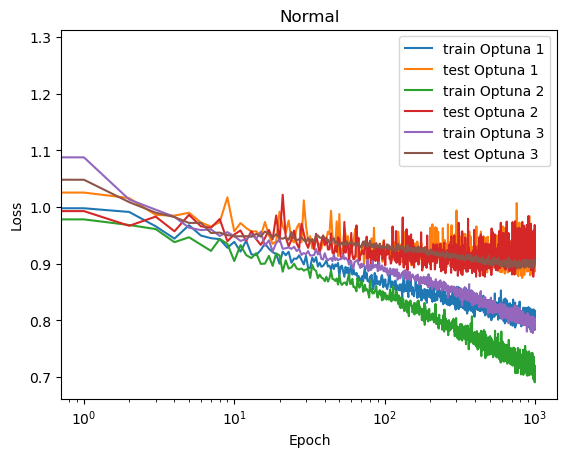

In [115]:
import matplotlib.pyplot as plt
plt.plot(train_losses_1, label = 'train Optuna 1')
plt.plot(test_losses_1, label = 'test Optuna 1')
plt.plot(train_losses_2, label = 'train Optuna 2')
plt.plot(test_losses_2, label = 'test Optuna 2')
plt.plot(train_losses_3, label = 'train Optuna 3')
plt.plot(test_losses_3, label = 'test Optuna 3')
#plt.plot(train_losses_non, label = 'train no Optuna')
# plt.plot(test_losses_non, label = 'test no Optuna')
plt.xscale('log')
#plt.xlim(100,1000)
plt.legend()
plt.title("Normal")
plt.xlabel("Epoch")
plt.ylabel("Loss")

## Optuna

In [5]:
def dynamic_model(trial, input_size, output_size, max_layers=3, max_neurons_layers=500):
    # define the tuple containing the different layers
    layers = []
    # get the number of hidden layers
    n_layers = trial.suggest_int("n_layers", 1, max_layers)
    # get the hidden layers
    in_features = input_size
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 4, max_neurons_layers)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU(0.2))
        p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.8)
        layers.append(nn.Dropout(p))
        in_features = out_features
    # get the last layer
    layers.append(nn.Linear(out_features, output_size))
    # return the model
    return nn.Sequential(*layers)


In [11]:
import numpy as np
import sys, os, time
import torch
import torch.nn as nn
import optuna
import h5py

In [89]:
class Objective(object):
    def __init__(self, input_size, output_size, max_layers, max_neurons_layers, device,
                 epochs, seed, batch_size):

        self.input_size         = input_size
        self.output_size        = output_size
        self.max_layers         = max_layers
        self.max_neurons_layers = max_neurons_layers
        self.device             = device
        self.epochs             = epochs
        self.seed               = seed
        self.batch_size         = batch_size

    def __call__(self, trial):

        # name of the files that will contain the losses and model weights
        f1 = 'losses_%s'%prefix
        f2 = 'models_%s'%prefix
        if not(os.path.exists(f1)):  os.system('mkdir %s'%f1)
        if not(os.path.exists(f2)):  os.system('mkdir %s'%f2)

        fout   = 'losses_%s/loss_%d.txt'%(prefix, trial.number)
        fmodel = 'models_%s/model_%d.pt'%(prefix, trial.number)
        
        dataname = 'fesc_test' # name of your dataset, for the loss file header
        
        # write properties & headers in case you need to refer in the future and you've changed the main.py file
        f = open(fout, 'w')
        f.write('training dataset: {}\n'.format(dataname))
        f.write('seed = {}\numFeatures = {}\nFeature List: {}\nfluxSize = {}\nbatch_size = {}\nepochs     = {}\n'.format(seed, input_size, features, output_size, batch_size, epochs))
        f.write('0 epoch  1 train loss  2 test loss\n')
        f.close()

        # generate the architecture
        model = dynamic_model(trial, self.input_size, self.output_size, 
                            self.max_layers, self.max_neurons_layers).to(self.device)

        # get the weight decay and learning rate values
        ## adjust boundary values as needed
        lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
        wd = trial.suggest_float("wd", 1e-8, 1e-2,  log=True)

        # define the optimizer
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr, betas=(0.5, 0.999), 
                                      weight_decay=wd)

        # define loss function
        criterion = nn.CrossEntropyLoss() 

        # get the data
        train_loader = create_dataset('train', self.seed, fin, self.batch_size, True)
        valid_loader = create_dataset('valid', self.seed, fin, self.batch_size, False)
        test_loader  = create_dataset('test',  self.seed, fin, self.batch_size, False)

        # train/validate model
        min_valid = 1e40
        for epoch in range(self.epochs):

            # training
            train_loss, points = 0.0, 0
            model.train()
            for x, y in train_loader:
                x, y = x.to(self.device), y.to(self.device)
                y_NN = model(x)
                
                loss = criterion(y_NN, y)
                train_loss += (loss.item())*x.shape[0]
                points     += x.shape[0]
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            train_loss /= points
            '''
            # validation
            valid_loss, points = 0.0, 0
            model.eval()
            with torch.no_grad():
                for x, y in valid_loader:
                    x, y = x.to(self.device), y.to(self.device)
                    y_NN = model(x)
                    valid_loss += (criterion(y_NN, y).item())*x.shape[0]
                    points     += x.shape[0]
            valid_loss /= points
            '''
            # do testing
            test_loss, points = 0.0, 0
            model.eval()
            for x, y in test_loader:
                with torch.no_grad():
                    x    = x.to(device)
                    y    = y.to(device)
                    y_NN = model(x)
                    test_loss += (criterion(y_NN, y).item())*x.shape[0]
                    points    += x.shape[0]
            test_loss /= points
            
            #save this model if it's better
            if test_loss<min_valid:  
                min_valid = test_loss
                torch.save(model.state_dict(), fmodel)
            f = open(fout, 'a')
            f.write('%d %.5e %.5e\n'%(epoch, train_loss, test_loss))
            f.close()

            # Handle pruning based on the intermediate value
            # comment out these lines if using pruning
            #trial.report(min_valid, epoch)
            #if trial.should_prune():  raise optuna.exceptions.TrialPruned()

        return min_valid


In [13]:
##################################### INPUT ##########################################
# data parameters
fin      = 'catalog.h5' # file containing your global properties
features = 'SFRs, Mstars, masses, redshifts, fgases' # writing the order of input data as per data.py. Modify as needed
f_features_norm = None
f_labels  = 'fesc_test.txt' # file containing output SEDs
seed      = 5

# optuna architecture parameters
input_size         = 5 # number of input global properties
output_size        = 4 # size of SED/wavelength array
max_layers         = 5 # max number of hidden layers to test out
max_neurons_layers = 500 # max number of nodes per hidden layer to test out

# training parameters
batch_size = 256
epochs     = 1000

# optuna parameters -- modify as needed
prefix    = 'inp{}out{}maxl{}maxn{}bs{}ep{}'.format(input_size, output_size, max_layers, max_neurons_layers, batch_size, epochs)
study_name       = 'fesc' 
n_trials         = 50 # set to None for infinite
storage          = 'sqlite:///fesc_%s.db'%prefix 
n_jobs           = 1
n_startup_trials = 30 # random sample the hyperparameter space before running the model sampler
#########################


In [24]:
device = torch.device('cpu')

# define the optuna study and optimize it
objective = Objective(input_size, output_size, max_layers, max_neurons_layers, 
                      device, epochs, seed, batch_size)
sampler = optuna.samplers.TPESampler(n_startup_trials=n_startup_trials)
study = optuna.create_study(study_name=study_name, sampler=sampler, storage=storage,
                            load_if_exists=True)
study.optimize(objective, n_trials, n_jobs=n_jobs)


[I 2023-05-30 14:28:00,876] Using an existing study with name 'fesc' instead of creating a new one.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:28:57,890] Trial 8 finished with value: 0.864860241739159 and parameters: {'n_layers': 1, 'n_units_l0': 367, 'dropout_l0': 0.3341021335365896, 'lr': 0.00029525002405914383, 'wd': 2.7740611661618873e-08}. Best is trial 8 with value: 0.864860241739159.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:30:01,155] Trial 9 finished with value: 0.8791436639606444 and parameters: {'n_layers': 1, 'n_units_l0': 260, 'dropout_l0': 0.6587076840928361, 'lr': 0.0006102248177915896, 'wd': 2.979319568744118e-05}. Best is trial 8 with value: 0.864860241739159.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:32:24,398] Trial 10 finished with value: 0.8742709648914826 and parameters: {'n_layers': 4, 'n_units_l0': 127, 'dropout_l0': 0.5454743816163948, 'n_units_l1': 364, 'dropout_l1': 0.4493852051363142, 'n_units_l2': 307, 'dropout_l2': 0.5617504936471762, 'n_units_l3': 100, 'dropout_l3': 0.4434103030999363, 'lr': 0.00878663119438215, 'wd': 1.6899001059862544e-07}. Best is trial 8 with value: 0.864860241739159.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:33:26,786] Trial 11 finished with value: 0.8474821830407168 and parameters: {'n_layers': 1, 'n_units_l0': 500, 'dropout_l0': 0.40906234276836123, 'lr': 0.0016703333738264645, 'wd': 0.004634386366871978}. Best is trial 11 with value: 0.8474821830407168.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:35:19,203] Trial 12 finished with value: 0.9018467537358276 and parameters: {'n_layers': 1, 'n_units_l0': 154, 'dropout_l0': 0.7015152728159351, 'lr': 0.00012903417615226106, 'wd': 8.806875624328273e-08}. Best is trial 11 with value: 0.8474821830407168.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:36:39,199] Trial 13 finished with value: 0.9170431229803298 and parameters: {'n_layers': 3, 'n_units_l0': 311, 'dropout_l0': 0.6182547208811342, 'n_units_l1': 40, 'dropout_l1': 0.7865436959245409, 'n_units_l2': 332, 'dropout_l2': 0.22581187164231137, 'lr': 1.8907240136011946e-05, 'wd': 4.1970531371583545e-08}. Best is trial 11 with value: 0.8474821830407168.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:38:11,815] Trial 14 finished with value: 0.8736080654665955 and parameters: {'n_layers': 2, 'n_units_l0': 234, 'dropout_l0': 0.4377911119381892, 'n_units_l1': 489, 'dropout_l1': 0.7646306810927221, 'lr': 5.917242312835639e-05, 'wd': 5.591341650872296e-08}. Best is trial 11 with value: 0.8474821830407168.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:39:33,223] Trial 15 finished with value: 0.9249685844804487 and parameters: {'n_layers': 5, 'n_units_l0': 19, 'dropout_l0': 0.707026684616864, 'n_units_l1': 30, 'dropout_l1': 0.7645584542245294, 'n_units_l2': 179, 'dropout_l2': 0.29592773931271094, 'n_units_l3': 25, 'dropout_l3': 0.28376212012585134, 'n_units_l4': 401, 'dropout_l4': 0.7626941978147719, 'lr': 0.001192343590478551, 'wd': 4.6320541100530785e-08}. Best is trial 11 with value: 0.8474821830407168.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:40:35,521] Trial 16 finished with value: 0.8563103864335606 and parameters: {'n_layers': 2, 'n_units_l0': 59, 'dropout_l0': 0.36910473489036655, 'n_units_l1': 184, 'dropout_l1': 0.7444675373400573, 'lr': 0.0005296153898970606, 'wd': 1.9207323735138295e-07}. Best is trial 11 with value: 0.8474821830407168.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:41:47,278] Trial 17 finished with value: 0.898330549399058 and parameters: {'n_layers': 3, 'n_units_l0': 112, 'dropout_l0': 0.5888288800108862, 'n_units_l1': 97, 'dropout_l1': 0.6257063617415248, 'n_units_l2': 288, 'dropout_l2': 0.3138832633252382, 'lr': 3.858623540234031e-05, 'wd': 8.100809928153834e-08}. Best is trial 11 with value: 0.8474821830407168.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:43:11,459] Trial 18 finished with value: 0.8111191886103052 and parameters: {'n_layers': 3, 'n_units_l0': 303, 'dropout_l0': 0.21302110046837186, 'n_units_l1': 135, 'dropout_l1': 0.3464039203065752, 'n_units_l2': 65, 'dropout_l2': 0.3031454880662703, 'lr': 0.002930419895618011, 'wd': 3.557206309313266e-05}. Best is trial 18 with value: 0.8111191886103052.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:45:22,520] Trial 19 finished with value: 0.810626839980101 and parameters: {'n_layers': 4, 'n_units_l0': 360, 'dropout_l0': 0.5991490308822351, 'n_units_l1': 318, 'dropout_l1': 0.6557328854093288, 'n_units_l2': 186, 'dropout_l2': 0.2229397980059654, 'n_units_l3': 230, 'dropout_l3': 0.37167582651003706, 'lr': 0.0005674724247255081, 'wd': 4.344007387477737e-05}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:48:42,324] Trial 20 finished with value: 0.8664553960164388 and parameters: {'n_layers': 5, 'n_units_l0': 230, 'dropout_l0': 0.5339768186535527, 'n_units_l1': 381, 'dropout_l1': 0.32633963424924506, 'n_units_l2': 437, 'dropout_l2': 0.47835749898599056, 'n_units_l3': 439, 'dropout_l3': 0.36417103417031205, 'n_units_l4': 204, 'dropout_l4': 0.20364906612668074, 'lr': 2.451723600453125e-05, 'wd': 1.73464041582714e-08}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:50:57,806] Trial 21 finished with value: 0.826063346149575 and parameters: {'n_layers': 4, 'n_units_l0': 413, 'dropout_l0': 0.2840360115303803, 'n_units_l1': 385, 'dropout_l1': 0.6716698041084634, 'n_units_l2': 157, 'dropout_l2': 0.7781546119227731, 'n_units_l3': 231, 'dropout_l3': 0.5920492999717565, 'lr': 0.00031700485996115243, 'wd': 1.413653963387667e-08}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:52:28,273] Trial 22 finished with value: 0.8772764934433831 and parameters: {'n_layers': 2, 'n_units_l0': 272, 'dropout_l0': 0.5896638051588627, 'n_units_l1': 499, 'dropout_l1': 0.7782370161610348, 'lr': 0.009555710448626607, 'wd': 0.00010660536421626011}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:53:29,635] Trial 23 finished with value: 0.8861547260202913 and parameters: {'n_layers': 2, 'n_units_l0': 198, 'dropout_l0': 0.34364773962101536, 'n_units_l1': 116, 'dropout_l1': 0.6704343430074371, 'lr': 3.909412264817733e-05, 'wd': 0.0001268493910225565}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:55:44,631] Trial 24 finished with value: 0.8117968164957486 and parameters: {'n_layers': 4, 'n_units_l0': 114, 'dropout_l0': 0.48460527050155255, 'n_units_l1': 298, 'dropout_l1': 0.6106308810711638, 'n_units_l2': 407, 'dropout_l2': 0.3934022377764687, 'n_units_l3': 144, 'dropout_l3': 0.43518501686196237, 'lr': 0.0014290436978758709, 'wd': 0.00042647577716798914}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 14:59:26,151] Trial 25 finished with value: 0.8394426907229627 and parameters: {'n_layers': 5, 'n_units_l0': 452, 'dropout_l0': 0.4044859345694273, 'n_units_l1': 255, 'dropout_l1': 0.4592194866076838, 'n_units_l2': 278, 'dropout_l2': 0.3261309950099395, 'n_units_l3': 394, 'dropout_l3': 0.747566431473947, 'n_units_l4': 446, 'dropout_l4': 0.25952679729369865, 'lr': 0.0076211887530850805, 'wd': 1.9554233358939645e-06}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:01:50,154] Trial 26 finished with value: 0.8151374148507403 and parameters: {'n_layers': 4, 'n_units_l0': 370, 'dropout_l0': 0.32635283597924675, 'n_units_l1': 446, 'dropout_l1': 0.42388958590347164, 'n_units_l2': 277, 'dropout_l2': 0.37446401381344585, 'n_units_l3': 44, 'dropout_l3': 0.43013009063799745, 'lr': 0.000411490189299287, 'wd': 5.242890897791664e-05}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:02:39,873] Trial 27 finished with value: 0.9619854928081871 and parameters: {'n_layers': 2, 'n_units_l0': 10, 'dropout_l0': 0.7909324405826814, 'n_units_l1': 37, 'dropout_l1': 0.6180587931811194, 'lr': 0.004348377346116614, 'wd': 2.5452236254590053e-07}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:04:33,692] Trial 28 finished with value: 0.8331200297062213 and parameters: {'n_layers': 3, 'n_units_l0': 466, 'dropout_l0': 0.23844823472147603, 'n_units_l1': 325, 'dropout_l1': 0.2645492382744255, 'n_units_l2': 144, 'dropout_l2': 0.21245728571098463, 'lr': 0.008757061437492192, 'wd': 6.975293253350143e-08}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:06:07,339] Trial 29 finished with value: 0.8140057208191636 and parameters: {'n_layers': 3, 'n_units_l0': 439, 'dropout_l0': 0.7040078458543306, 'n_units_l1': 111, 'dropout_l1': 0.5211843516563969, 'n_units_l2': 334, 'dropout_l2': 0.24948652062791432, 'lr': 0.0009127442228999548, 'wd': 4.498254507140791e-08}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:06:52,783] Trial 30 finished with value: 0.9014802809454437 and parameters: {'n_layers': 1, 'n_units_l0': 37, 'dropout_l0': 0.519655912562224, 'lr': 0.00048618085053630427, 'wd': 0.0002463222576753762}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:07:53,313] Trial 31 finished with value: 0.8369535161898687 and parameters: {'n_layers': 2, 'n_units_l0': 477, 'dropout_l0': 0.4965802668361152, 'n_units_l1': 20, 'dropout_l1': 0.29511076657033475, 'lr': 0.0008270607012241973, 'wd': 0.0009761686627863675}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:09:43,436] Trial 32 finished with value: 0.8258265256881714 and parameters: {'n_layers': 5, 'n_units_l0': 91, 'dropout_l0': 0.26643005266356207, 'n_units_l1': 244, 'dropout_l1': 0.2736264740670946, 'n_units_l2': 238, 'dropout_l2': 0.7707158825133271, 'n_units_l3': 391, 'dropout_l3': 0.6664625969380964, 'n_units_l4': 24, 'dropout_l4': 0.30464904128697207, 'lr': 0.00040840191026894856, 'wd': 6.547810782987425e-05}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:10:47,352] Trial 33 finished with value: 0.8614343812323024 and parameters: {'n_layers': 1, 'n_units_l0': 486, 'dropout_l0': 0.2652034747574801, 'lr': 0.0002829429115413234, 'wd': 4.228299239083821e-06}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:12:56,079] Trial 34 finished with value: 0.8682320102667197 and parameters: {'n_layers': 4, 'n_units_l0': 449, 'dropout_l0': 0.5736514709524285, 'n_units_l1': 465, 'dropout_l1': 0.3415756373080645, 'n_units_l2': 158, 'dropout_l2': 0.3609110179915133, 'n_units_l3': 132, 'dropout_l3': 0.5821705129257267, 'lr': 2.4258585155775164e-05, 'wd': 4.70726725114963e-06}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:14:09,022] Trial 35 finished with value: 0.82264449657538 and parameters: {'n_layers': 2, 'n_units_l0': 371, 'dropout_l0': 0.2343662957428788, 'n_units_l1': 253, 'dropout_l1': 0.31884666397287853, 'lr': 0.0002990902188937155, 'wd': 3.0146208562273306e-05}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:15:25,816] Trial 36 finished with value: 0.8927912472659706 and parameters: {'n_layers': 3, 'n_units_l0': 235, 'dropout_l0': 0.21663207434441076, 'n_units_l1': 131, 'dropout_l1': 0.5715132537824648, 'n_units_l2': 48, 'dropout_l2': 0.7013488778570933, 'lr': 2.3307642183504116e-05, 'wd': 0.005334011641465228}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:17:58,408] Trial 37 finished with value: 0.9034011914179876 and parameters: {'n_layers': 5, 'n_units_l0': 151, 'dropout_l0': 0.25200225327132475, 'n_units_l1': 243, 'dropout_l1': 0.5580504326897318, 'n_units_l2': 24, 'dropout_l2': 0.6039313276614103, 'n_units_l3': 410, 'dropout_l3': 0.3287181652166884, 'n_units_l4': 274, 'dropout_l4': 0.2565279039236824, 'lr': 1.5845706113211045e-05, 'wd': 0.003375456751139879}. Best is trial 19 with value: 0.810626839980101.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:21:26,390] Trial 38 finished with value: 0.8062396895172249 and parameters: {'n_layers': 4, 'n_units_l0': 319, 'dropout_l0': 0.48326007288595463, 'n_units_l1': 309, 'dropout_l1': 0.22691770014786583, 'n_units_l2': 487, 'dropout_l2': 0.4133618765743943, 'n_units_l3': 245, 'dropout_l3': 0.20222387654738752, 'lr': 0.0024461318194048767, 'wd': 0.00038150231346785777}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:24:56,312] Trial 39 finished with value: 0.8106441951205587 and parameters: {'n_layers': 4, 'n_units_l0': 324, 'dropout_l0': 0.45212603852888217, 'n_units_l1': 308, 'dropout_l1': 0.20829617143694434, 'n_units_l2': 435, 'dropout_l2': 0.4136580944594345, 'n_units_l3': 243, 'dropout_l3': 0.20745812062114327, 'lr': 0.0022332915741232204, 'wd': 0.00025386911868381814}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:30:47,866] Trial 40 finished with value: 0.8098740266938494 and parameters: {'n_layers': 4, 'n_units_l0': 318, 'dropout_l0': 0.4690568642669806, 'n_units_l1': 310, 'dropout_l1': 0.20726424928593012, 'n_units_l2': 500, 'dropout_l2': 0.42728466299896267, 'n_units_l3': 264, 'dropout_l3': 0.20917920438201437, 'lr': 0.002750579044392801, 'wd': 1.818592685905222e-05}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:38:13,310] Trial 41 finished with value: 0.81260019999284 and parameters: {'n_layers': 4, 'n_units_l0': 338, 'dropout_l0': 0.46703600890537467, 'n_units_l1': 308, 'dropout_l1': 0.20471813251561533, 'n_units_l2': 486, 'dropout_l2': 0.4377862466739525, 'n_units_l3': 272, 'dropout_l3': 0.20060609598820855, 'lr': 0.002327165321413894, 'wd': 1.517800705407727e-05}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:41:56,515] Trial 42 finished with value: 0.8138837157151638 and parameters: {'n_layers': 4, 'n_units_l0': 392, 'dropout_l0': 0.45277954455738195, 'n_units_l1': 341, 'dropout_l1': 0.2038484650396022, 'n_units_l2': 490, 'dropout_l2': 0.43765652022011153, 'n_units_l3': 260, 'dropout_l3': 0.20447783802311417, 'lr': 0.0019779894665169044, 'wd': 0.0006136276787244275}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:45:25,229] Trial 43 finished with value: 0.8089828924236134 and parameters: {'n_layers': 4, 'n_units_l0': 329, 'dropout_l0': 0.5241397033895479, 'n_units_l1': 409, 'dropout_l1': 0.2276192959678428, 'n_units_l2': 433, 'dropout_l2': 0.41643306237120936, 'n_units_l3': 218, 'dropout_l3': 0.2574725114126235, 'lr': 0.0038204331321423086, 'wd': 0.00019031095023736702}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:48:40,162] Trial 44 finished with value: 0.8210537800422082 and parameters: {'n_layers': 4, 'n_units_l0': 289, 'dropout_l0': 0.5098873292171263, 'n_units_l1': 420, 'dropout_l1': 0.24226081041702163, 'n_units_l2': 391, 'dropout_l2': 0.49386114139843174, 'n_units_l3': 306, 'dropout_l3': 0.2745478202640323, 'lr': 0.004235034210527782, 'wd': 1.5492764000296292e-05}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:52:02,800] Trial 45 finished with value: 0.8135972175842676 and parameters: {'n_layers': 4, 'n_units_l0': 345, 'dropout_l0': 0.5411292921606636, 'n_units_l1': 412, 'dropout_l1': 0.2536176563724889, 'n_units_l2': 495, 'dropout_l2': 0.36438205054164924, 'n_units_l3': 196, 'dropout_l3': 0.27615615732074394, 'lr': 0.0012216084412273928, 'wd': 0.001522736804991795}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:55:28,330] Trial 46 finished with value: 0.8357018308761792 and parameters: {'n_layers': 5, 'n_units_l0': 410, 'dropout_l0': 0.4872013916738889, 'n_units_l1': 355, 'dropout_l1': 0.3837573762486173, 'n_units_l2': 437, 'dropout_l2': 0.4647180094668054, 'n_units_l3': 313, 'dropout_l3': 0.26549692838854816, 'n_units_l4': 35, 'dropout_l4': 0.5517707049139522, 'lr': 0.004681924558146363, 'wd': 0.00011330876463663543}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:57:21,651] Trial 47 finished with value: 0.819058442217672 and parameters: {'n_layers': 4, 'n_units_l0': 278, 'dropout_l0': 0.5569951464466195, 'n_units_l1': 282, 'dropout_l1': 0.24487697498520708, 'n_units_l2': 224, 'dropout_l2': 0.5317854926753619, 'n_units_l3': 186, 'dropout_l3': 0.35149363019553037, 'lr': 0.0008500447247091103, 'wd': 0.0002747857308848619}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 15:59:25,971] Trial 48 finished with value: 0.807845708141979 and parameters: {'n_layers': 4, 'n_units_l0': 348, 'dropout_l0': 0.622535951489127, 'n_units_l1': 193, 'dropout_l1': 0.2944561169852477, 'n_units_l2': 386, 'dropout_l2': 0.27110186636701794, 'n_units_l3': 334, 'dropout_l3': 0.2360948627470487, 'lr': 0.0029533480953580784, 'wd': 0.0021428509410328185}. Best is trial 38 with value: 0.8062396895172249.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 16:59:40,360] Trial 49 finished with value: 0.7992990006748427 and parameters: {'n_layers': 4, 'n_units_l0': 326, 'dropout_l0': 0.6140597590944773, 'n_units_l1': 203, 'dropout_l1': 0.28132639142015986, 'n_units_l2': 460, 'dropout_l2': 0.25855030410354674, 'n_units_l3': 337, 'dropout_l3': 0.24732580986058228, 'lr': 0.0033140422147764532, 'wd': 0.0020272408464552176}. Best is trial 49 with value: 0.7992990006748427.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 17:02:59,176] Trial 50 finished with value: 0.8120611396610228 and parameters: {'n_layers': 3, 'n_units_l0': 307, 'dropout_l0': 0.6519299553883411, 'n_units_l1': 201, 'dropout_l1': 0.29256695887265416, 'n_units_l2': 386, 'dropout_l2': 0.2774223440111872, 'lr': 0.002868286381988843, 'wd': 0.0021602034372993207}. Best is trial 49 with value: 0.7992990006748427.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[I 2023-05-30 17:07:26,360] Trial 51 finished with value: 0.8061743205429143 and parameters: {'n_layers': 4, 'n_units_l0': 330, 'dropout_l0': 0.5534998934161739, 'n_units_l1': 187, 'dropout_l1': 0.24426453778323703, 'n_units_l2': 461, 'dropout_l2': 0.3472130656202943, 'n_units_l3': 339, 'dropout_l3': 0.2390534482829094, 'lr': 0.0016548129613482795, 'wd': 0.0009975663426494727}. Best is trial 49 with value: 0.7992990006748427.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 5]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 5]) torch.Size([468])


[W 2023-05-30 17:10:11,961] Trial 52 failed with parameters: {'n_layers': 5, 'n_units_l0': 348, 'dropout_l0': 0.6207628291495344, 'n_units_l1': 183, 'dropout_l1': 0.2939871729974734, 'n_units_l2': 458, 'dropout_l2': 0.342651045301261, 'n_units_l3': 340, 'dropout_l3': 0.2536541456847078, 'n_units_l4': 190, 'dropout_l4': 0.45809163193333335, 'lr': 0.001726930611541888, 'wd': 0.00111457004477578} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/bsherwin51/anaconda3/envs/REU/lib/python3.11/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_35103/544416601.py", line 64, in __call__
    y_NN = model(x)
           ^^^^^^^^
  File "/home/bsherwin51/anaconda3/envs/REU/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "

KeyboardInterrupt: 

Trial 49 finished with value: 0.7992990006748427 and parameters: {'n_layers': 4, 'n_units_l0': 326, 'dropout_l0': 0.6140597590944773, 'n_units_l1': 203, 'dropout_l1': 0.28132639142015986, 'n_units_l2': 460, 'dropout_l2': 0.25855030410354674, 'n_units_l3': 337, 'dropout_l3': 0.24732580986058228, 'lr': 0.0033140422147764532, 'wd': 0.0020272408464552176}. Best is trial 49 with value: 0.7992990006748427.